In [63]:
from langchain_community.tools import WikipediaQueryRun

In [64]:
from langchain_community.utilities import WikipediaAPIWrapper

In [65]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=1000)

In [66]:
wiki_tool = WikipediaQueryRun(api_wrapper = api_wrapper)

In [67]:
wiki_tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [68]:
wiki_tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [69]:
wiki_tool.run({"query":"LangChain"})

"Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\nPage: Model Context Protocol\nSummary: The Model Context Protocol (MCP) is an open standard, open-source framework introduced by Anthropic in November 2024 to standardize the way artificial intelligence (AI) systems like large language models (LLMs) integrate and share data with external tools, systems, and data sources. MCP provides a universal interface for reading files, executing functions, and handling contextual prompts. Following its announcement, the protocol was adopted by major AI providers, including OpenAI and Google DeepMind.\n\nPage: Intelligent agent\nSummary: In artificial intelligence, an intelligent agent is an entity that

In [70]:
from langchain_community.tools import YouTubeSearchTool

In [71]:
tools =  YouTubeSearchTool()

In [72]:
tools.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [73]:
tools.args

{'query': {'title': 'Query', 'type': 'string'}}

In [74]:
tools.run("dhruv rathee new video")

"['https://www.youtube.com/watch?v=HGZ7yK5XT7g&pp=ygUWZGhydXYgcmF0aGVlIG5ldyB2aWRlbw%3D%3D', 'https://www.youtube.com/watch?v=j9R3q6_khHo&pp=ygUWZGhydXYgcmF0aGVlIG5ldyB2aWRlbw%3D%3D']"

In [75]:
from langchain_community.tools import TavilySearchResults

In [76]:
tools = TavilySearchResults(tavily_api_key="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")

In [77]:
tools.invoke({"query":"Why dhruv rathee is called german shepherd??"})

[{'title': 'About Dhruv Rathee and why people call him German Shepard - X',
  'url': 'https://x.com/KhabriBossLady/status/1899880805251592258',
  'content': 'People call Dhruv Rathee "German Shepherd" primarily as a mocking or derogatory nickname that has gained traction among his critics.',
  'score': 0.8679453},
 {'title': "Why Is Twitter Buzzing with Dhruv Rathee as a 'German Shepherd'? The ...",
  'url': 'https://celebrityplus.net/why-is-twitter-buzzing-with-dhruv-rathee-as-a-german-shepherd-the-full-story-explained/',
  'content': 'Who is Dhruv Rathee ( Nicknamed as German Shepherd by Twitter)? Dhruv Rathee is an Indian YouTuber and social media influencer with over 5 million subscribers on YouTube. He is known for his vocal commentary on Indian politics, government policies, economy, and society from a largely left-liberal perspective.',
  'score': 0.7882741},
 {'title': "Dhruv Rathee: YouTuber's education, profession, political party and ...",
  'url': 'https://economictimes.ind

### Custom tool

In [78]:
from langchain.agents import tool  # Correct import

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two integers and return the result."""  # <-- Required docstring
    return a * b


In [79]:
multiply.invoke({"a":10,"b":40})

400

In [80]:
multiply.description

'Multiply two integers and return the result.'

In [81]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [82]:
@tool
def get_word_len(word:str)->int:
    """Find Length of the word"""
    return len(word)

In [83]:
get_word_len.invoke("Arindam")

7

In [84]:
get_word_len.args

{'word': {'title': 'Word', 'type': 'string'}}

In [99]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [100]:
def llm(input):
    model = ChatGoogleGenerativeAI(
        model="gemini-1.5-flash",
        max_output_tokens=1000,
    )
    return model.invoke(input).content

In [101]:
print(llm("What is LangChain?"))

LangChain is a framework for developing applications powered by language models.  It's designed to make it easier to build applications that use LLMs effectively by providing a structured way to:

* **Connect to multiple LLMs:** LangChain isn't tied to a single LLM provider.  You can easily switch between different models (e.g., OpenAI, Hugging Face Hub, etc.) without rewriting significant portions of your code.

* **Manage memory and context:**  LLMs have limited context windows.  LangChain provides tools to manage this limitation, allowing you to maintain and access information across multiple interactions with the LLM.  This is crucial for building applications that need to remember previous conversations or process long documents.  Examples include memory mechanisms like ConversationBufferMemory and ConversationSummaryBufferMemory.

* **Chain multiple calls to LLMs:** LangChain enables you to sequence multiple LLM calls, creating complex workflows.  This allows you to break down co

In [102]:
def token_counter(input):
    tokens = input.split()
    print(f"Input text: {input}\n\n")
    return f"Total number of tokens: {len(tokens)}"

In [103]:
from langgraph.graph import Graph

In [104]:
workflow_new = Graph() 

In [105]:
workflow_new.add_node("My_Llm",llm)

In [106]:
workflow_new.add_node("Token_Counter",token_counter)

In [107]:
workflow_new.add_edge("My_Llm", "Token_Counter")

In [108]:
workflow_new.set_entry_point("My_Llm")

In [109]:
workflow_new.set_finish_point("Token_Counter")

In [110]:
app = workflow_new.compile()

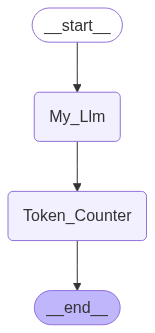

In [111]:
app

In [112]:
app.invoke("Whats the capital of India?")

Input text: The capital of India is **New Delhi**.




'Total number of tokens: 7'

In [114]:
app.invoke("Whats the feeling of people about Dhruv Rathee? Be Trueful and honest in your answer.")

Input text: Public opinion on Dhruv Rathee is highly divided.  

Many view him as a credible and unbiased source of information, appreciating his in-depth analysis of political and social issues. They see his videos as helpful in understanding complex topics and forming informed opinions.  His supporters often praise his research and fact-checking, though some acknowledge potential biases.

However, a significant portion of the population is highly critical of him.  These critics accuse him of being biased, presenting information selectively, and pushing a particular political agenda.  They often cite instances where they believe his analysis is flawed or misleading, questioning the objectivity of his reporting.  Some even label him as propaganda.  The strong negative reactions often stem from his critical stance on certain political figures and ideologies.

In short, there's no single, universally held opinion on Dhruv Rathee.  His work elicits strong reactions, both positive and nega

'Total number of tokens: 170'